In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
from scipy.stats import skew, mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
import statsmodels
import xgboost as xgb
import itertools
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf
from sklearn import metrics

In [53]:
dataset = pd.read_csv('Medie_zi_close.csv')
# X = sentimentul, Y = randamentul
X = dataset.iloc[:, 4:5].values
y = dataset.iloc[:, 2].values
y

array(['Negative', 'Negative', 'Positive', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print(f'The train dataset has {X_train.shape[0]} observations')
print(f'The train dataset has {X_test.shape[0]} observations')

The train dataset has 1551 observations
The train dataset has 665 observations


In [41]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X, y)
# predict the response values for the observations in X
logreg.predict(X)
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

2216

In [42]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y, y_pred))

0.5627256317689531


In [43]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.5729323308270676


In [44]:
##### Modeling #####
# Create a cross validation function
def get_best_model(estimator, params_grid = {}):
    model = GridSearchCV(estimator = estimator, param_grid = params_grid, cv = 3, scoring = "accuracy", n_jobs = -1)
    model.fit(X_train, Y_train)
    print('\n--- Best Parameters -----------------------------')
    print(model.best_params_)
    print('\n--- Best Model -----------------------------')
    best_model = model.best_estimator_
    print(best_model)
    return best_model


# The confusion matrix plotting function is from the sklearn documentation below: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(conf_matrix, classes, title, normalize = False, cmap = plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(conf_matrix, interpolation = 'nearest', cmap =  cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis = 1)[:, np.newaxis]

    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
        plt.text(j, i, conf_matrix[i, j],
                 horizontalalignment="center",
                 color="black" if conf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = ['Succes', 'Eșec']


# Create a model fitting function
def model_fit(model, feature_imp, cv = 5):
    # model fit
    clf = model.fit(X_train, Y_train)

    # model prediction
    y_pred = clf.predict(X_test)

    # model report
    conf_matrix = confusion_matrix(Y_test, y_pred)
    plot_confusion_matrix(conf_matrix, classes = class_names, title = 'Confusion matrix')


    print('\n--- Train Set -----------------------------')
    print('Accuracy: %.5f +/- %.4f' % (np.mean(cross_val_score(clf, X_train, Y_train, cv = cv)), np.std(cross_val_score(clf, X_train, Y_train, cv = cv))))
    print('AUC: %.5f +/- %.4f' % (np.mean(cross_val_score(clf, X_train, Y_train, cv = cv, scoring = 'roc_auc')), np.std(cross_val_score(clf, X_train, Y_train, cv = cv, scoring = 'roc_auc'))))
    print('\n--- Validation Set -----------------------------')
    print('Accuracy: %.5f +/- %.4f' % (np.mean(cross_val_score(clf, X_test, Y_test, cv = cv)), np.std(cross_val_score(clf, X_test, Y_test, cv = cv))))
    print('AUC: %.5f +/- %.4f' % (np.mean(cross_val_score(clf, X_test, Y_test, cv = cv, scoring = 'roc_auc')), np.std(cross_val_score(clf, X_test, Y_test, cv = cv, scoring = 'roc_auc'))))
    print('-----------------------------------------------')




--- Best Parameters -----------------------------
{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

--- Best Model -----------------------------
KNeighborsClassifier(n_neighbors=7, p=1)

--- Train Set -----------------------------
Accuracy: 0.50871 +/- 0.0174
AUC: 0.50341 +/- 0.0173

--- Validation Set -----------------------------
Accuracy: 0.55188 +/- 0.0280
AUC: 0.57249 +/- 0.0375
-----------------------------------------------


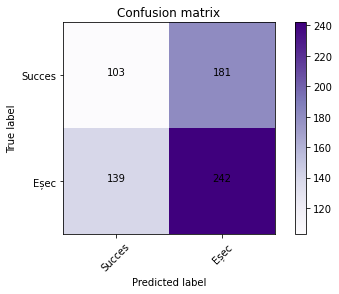

In [45]:
## k-Nearest Neighbors (KNN) 
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [5, 6, 7],
               'p': [1, 2],
               'weights': ['uniform', 'distance']}
clf_knn = get_best_model(knn, parameters)
model_fit(model = clf_knn, feature_imp = False)
y_pred = clf_knn.predict(X_test)
plt.show()


--- Train Set -----------------------------
Accuracy: 0.55383 +/- 0.0065
AUC: 0.53579 +/- 0.0234

--- Validation Set -----------------------------
Accuracy: 0.56992 +/- 0.0283
AUC: 0.58323 +/- 0.0603
-----------------------------------------------


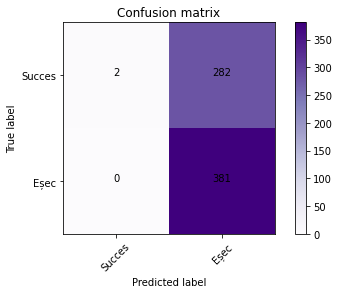

In [46]:
# Naive Bayes Classifier
clf_nb = GaussianNB()
model_fit(model = clf_nb, feature_imp = False)
y_pred = clf_nb.predict(X_test)
plt.show()


--- Best Parameters -----------------------------
{'C': 0.8}

--- Best Model -----------------------------
LogisticRegression(C=0.8, max_iter=2400, random_state=3)

--- Train Set -----------------------------
Accuracy: 0.55835 +/- 0.0006
AUC: 0.53582 +/- 0.0234

--- Validation Set -----------------------------
Accuracy: 0.57293 +/- 0.0030
AUC: 0.58323 +/- 0.0603
-----------------------------------------------


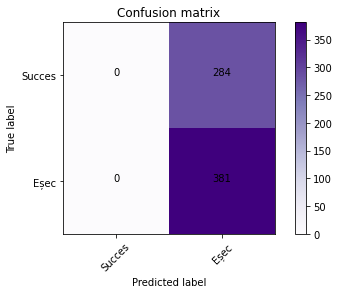

In [47]:
lg = LogisticRegression(random_state = 3, max_iter = 2400)
parameters = {'C': [0.8, 0.9, 1]}
clf_lg = get_best_model(lg, parameters)
model_fit(model = clf_lg, feature_imp = True)
y_pred = clf_lg.predict(X_test)
plt.show()


--- Best Parameters -----------------------------
{'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 100}

--- Best Model -----------------------------
RandomForestClassifier(max_depth=10, min_samples_split=3, random_state=3)

--- Train Set -----------------------------
Accuracy: 0.52741 +/- 0.0196
AUC: 0.49990 +/- 0.0372

--- Validation Set -----------------------------
Accuracy: 0.59098 +/- 0.0325
AUC: 0.59563 +/- 0.0473
-----------------------------------------------


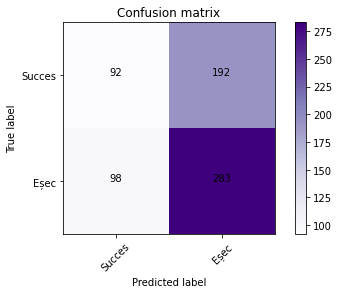

In [48]:
rf = RandomForestClassifier(random_state = 3)
parameters = {'n_estimators': [100],
              'max_depth': [10],
              'min_samples_split': [3]}
clf_rf= get_best_model(rf, parameters)
model_fit(model = clf_rf, feature_imp = True)


--- Best Parameters -----------------------------
{'C': 0.5, 'gamma': 0.0001}

--- Best Model -----------------------------
SVC(C=0.5, gamma=0.0001, probability=True, random_state=3)

--- Train Set -----------------------------
Accuracy: 0.55835 +/- 0.0006
AUC: 0.53582 +/- 0.0234

--- Validation Set -----------------------------
Accuracy: 0.57293 +/- 0.0030
AUC: 0.58323 +/- 0.0603
-----------------------------------------------


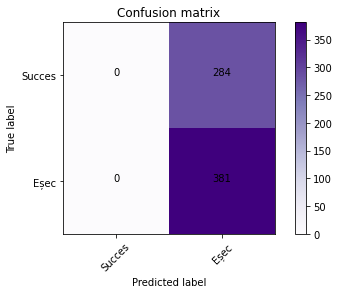

In [49]:
svc = svm.SVC(kernel = 'rbf', probability = True, random_state = 3)
parameters = {'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5],
              'C': [0.5, 1, 5, 0.1, 100, 1000]}
clf_svc = get_best_model(svc, parameters)
model_fit(model = clf_svc, feature_imp = False)
y_pred = clf_svc.predict(X_test)
plt.show()


--- Best Parameters -----------------------------
{}

--- Best Model -----------------------------
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

--- Train Set -----------------------------
Accuracy: 0.54095 +/- 0.0132
AUC: 0.49116 +/- 0.0367

--- Validation Set -----------------------------
Accuracy: 0.57594 +/- 0.0221
AUC: 0.58445 +/- 0.0290
-----------------------------------------------


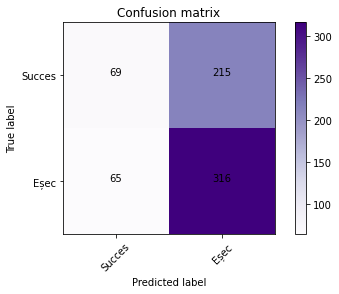

In [50]:
## Adaptative Boosting (adaboost) ##
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200)
clf_ada = get_best_model(ada)
model_fit(model = clf_ada, feature_imp = True)
y_pred = clf_ada.predict(X_test)
plt.show()

In [51]:
# ##### Model Evaluation #####
# # Compare model performance
classifiers = [clf_knn, clf_nb, clf_lg, clf_rf, clf_svc,clf_ada]
index = ['K-Nearest Neighbors', 'Naive Bayes', 'Logistic Regression', 'Random Forest', 'Support Vector Machines', 'AdaBoost']
scores = []
for clf in classifiers:
    score = np.mean(cross_val_score(clf, X_test, Y_test, cv = 5, scoring = 'accuracy'))
    scores = np.append(scores, score)
models = pd.Series(scores, index = index)
models.sort_values(ascending = True, inplace = True)
print(models)

K-Nearest Neighbors        0.551880
Naive Bayes                0.569925
Logistic Regression        0.572932
Support Vector Machines    0.572932
AdaBoost                   0.575940
Random Forest              0.590977
dtype: float64
